In [2]:
import pandas as pd
df = pd.read_csv("Data.csv")
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [3]:
null_values = df.isnull().sum()
null_values

,0
Country Code,0
Region,48
IncomeGroup,49
SpecialNotes,138
TableName,0
Unnamed: 5,265


In [5]:
# prompt: #fill NaN with mean of Region IncomeGroup SpecialNotes columns

# Fill NaN values in 'Region', 'IncomeGroup', and 'SpecialNotes' columns with their respective means.
# Note that mean is not applicable for categorical features like 'Region', 'IncomeGroup', and 'SpecialNotes'.
# We will use the mode instead.

for col in ['Region', 'IncomeGroup', 'SpecialNotes']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check if there are still null values.
null_values = df.isnull().sum()
null_values

,0
Country Code,0
Region,0
IncomeGroup,0
SpecialNotes,0
TableName,0
Unnamed: 5,265


In [8]:

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    df

In [9]:
#get duplicate samples from df

duplicate_samples = df[df.duplicated(keep=False)]  #Marks all occurrences of duplicate rows as duplicates.
print(duplicate_samples)

Empty DataFrame
Columns: [Country Code, Region, IncomeGroup, SpecialNotes, TableName, Unnamed: 5]
Index: []


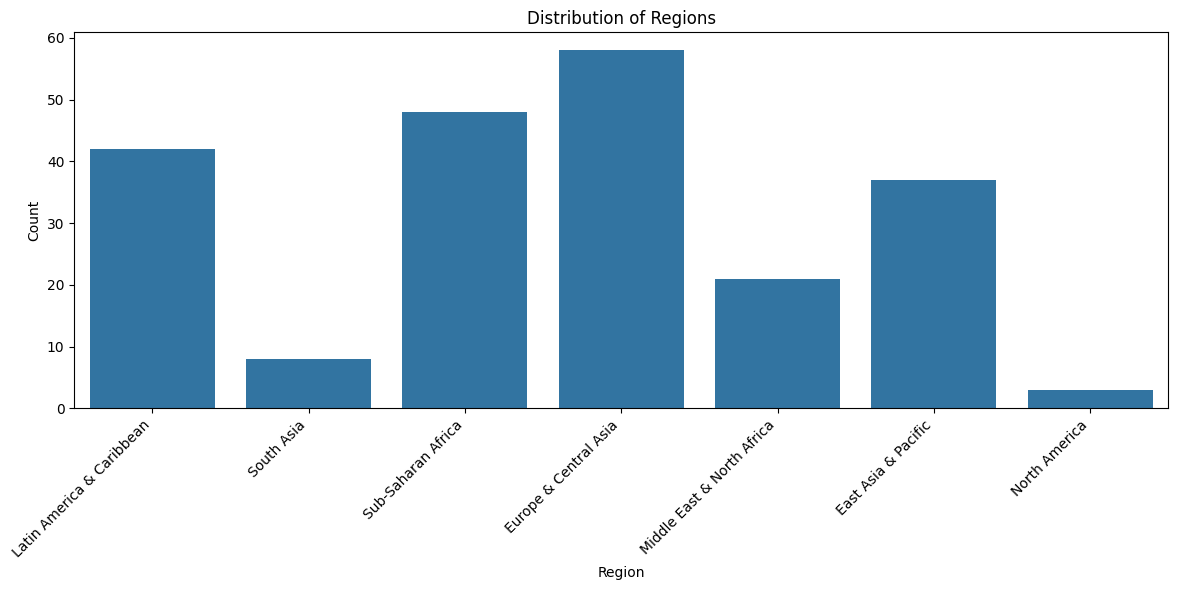

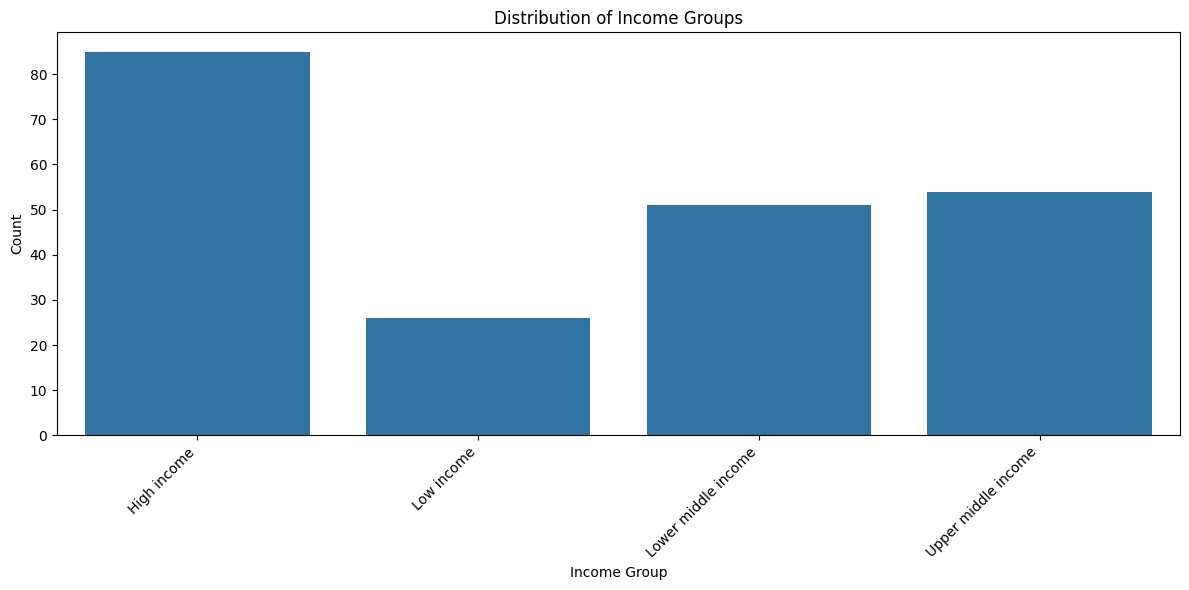

In [15]:
# prompt: plot histogram for categorical

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you want to plot the distribution of 'Region'
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='Region', data=df)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Example for 'IncomeGroup'
plt.figure(figsize=(12, 6)) # Adjust figure size if needed
sns.countplot(x='IncomeGroup', data=df)
plt.title('Distribution of Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()